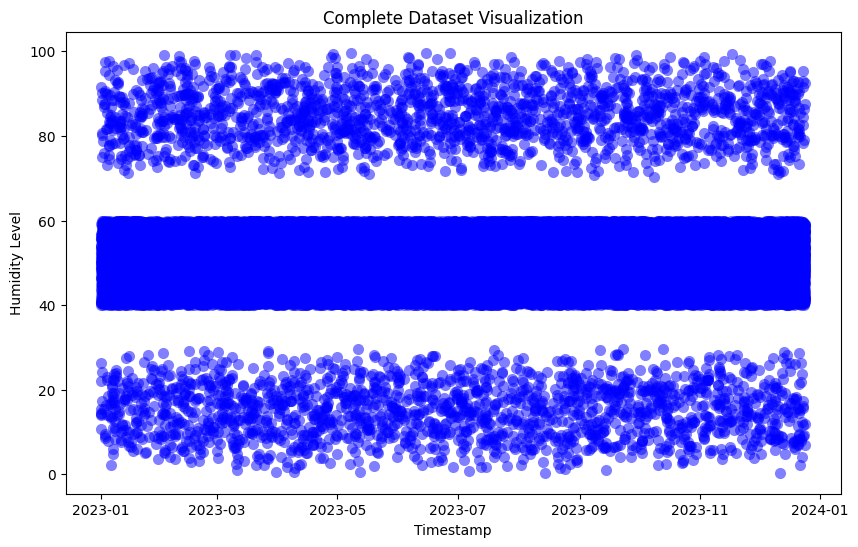

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

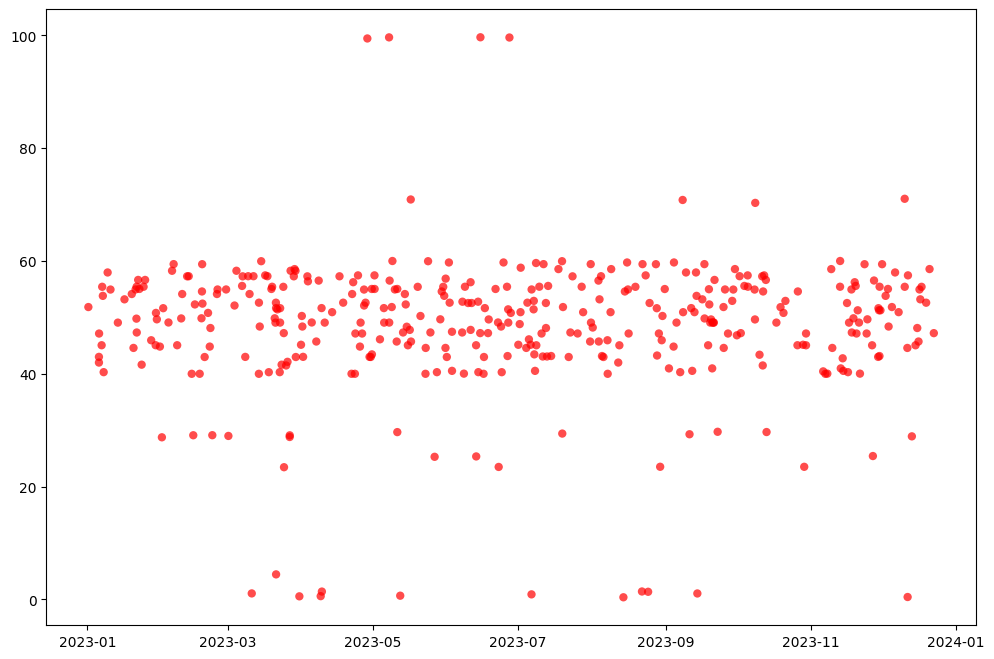

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv('humidity_dataset.csv', parse_dates=['timestamp'])

# Sort the dataset by timestamp
data.sort_values(by='timestamp', inplace=True)

# Plot the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['humidity'], marker='o', linestyle='', color='blue', alpha=0.5, markersize=8, markeredgecolor='none')
plt.title('Complete Dataset Visualization')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.show()

# Prepare data for training
X_train = data[['humidity']].values

# Create the LOF model
lof_model = LocalOutlierFactor(contamination=0.01)  # Adjust contamination if needed

# Fit the model and predict anomalies
y_pred_train = lof_model.fit_predict(X_train)
y_pred_train = (y_pred_train == -1)  # Convert predictions to binary labels (1 for anomalies, 0 for normal)

# Calculate evaluation metrics
y_train = (X_train < 40) | (X_train > 60)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot anomalies
plt.figure(figsize=(12, 8))
plt.scatter(data['timestamp'][y_pred_train], data['humidity'][y_pred_train], color='red', marker='o', alpha=0.7, edgecolor='none', label='Predicted Anomalies')
plt.scatter(data['timestamp'][~y_train], data['humidity'][~y_train], color='blue', marker='o', alpha=0.5, edgecolor='none', label='Normal Data')
plt.scatter(data['timestamp'][(data['humidity'] >= 40) & (data['humidity'] <= 60)], data['humidity'][(data['humidity'] >= 40) & (data['humidity'] <= 60)], color='red', marker='o', alpha=0.3, edgecolor='none')  # Anomalies within range plotted in translucent red
plt.title('Anomaly Detection with LOF')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.legend()
plt.show()

# Print evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
# Load the testing dataset
testing_data = pd.read_csv('training.csv', parse_dates=['timestamp'])  # Update the file path if needed

# Sort the testing dataset by timestamp
testing_data.sort_values(by='timestamp', inplace=True)

# Prepare data for testing
X_test = testing_data[['humidity']].values

# Predict anomalies on the testing dataset
y_pred_test = lof_model.fit_predict(X_test)
y_pred_test = (y_pred_test == -1)  # Convert predictions to binary labels (1 for anomalies, 0 for normal)

# Calculate evaluation metrics for testing
y_test = (X_test < 40) | (X_test > 60)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics for testing
print("Testing Metrics:")
print("Accuracy: {:.5f}".format(accuracy_test))
print("Precision: {:.5f}".format(precision_test))
print("Recall: {:.5f}".format(recall_test))
print("F1 Score: {:.5f}".format(f1_test))
print("Confusion Matrix:")
print(conf_matrix_test)


Testing Metrics:
Accuracy: 0.90500
Precision: 1.00000
Recall: 0.09524
F1 Score: 0.17391
Confusion Matrix:
[[895   0]
 [ 95  10]]
